In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_regression

In [35]:
X,y = make_regression(n_samples=10000,n_features=20,n_informative=20,noise = 10, random_state=1)

#Normalisation 
u = X.mean(axis=0)
std = X.std(axis=0)
X = (X-u)/std

In [36]:
#Add a column of 1's for vectoriation
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

print(X.shape,y.shape)

(10000, 21) (10000,)


In [37]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e += np.sum((y_ - y)**2)
    m = X.shape[0]
    return e/m

def gradient(X,y,theta):
    
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    return grad/m

#Batch Gradient Descent
def gradient_Descent(X,y,max_steps=300,learning_rate=0.01):
    
    n = X.shape[1]
    theta = np.zeros((n))
    error_list = []
    
    for i in range(max_steps):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Batch Gradient Descent - Compute the gradient wrt to entire dataset
        grad = gradient(X,y,theta)
        theta = theta - grad*learning_rate
        
    return theta,error_list
    

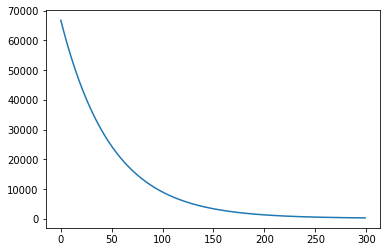

In [38]:
# Batch Gradient Descent -- 300 iterations, lr = 0.01
theta,error_list = gradient_Descent(X,y)

plt.plot(np.arange(len(error_list)),error_list)
plt.show()

In [39]:
y.shape

(10000,)

In [40]:
z = y.reshape(-1,1)
z.shape

(10000, 1)

In [41]:
def batch_gradient_descent(X,y,batch_size=200,learning_rate=0.01,max_iters=100):
    n = X.shape[1]
    theta = np.zeros(n)
    error_list = []
    
    #we need to shuffle our data therefore stacking X and y (y was a matrix after reshape we converted into a matrix)
    data = np.hstack((X,y.reshape(-1,1))) #shuffling is important to have some kind of randomness in our data
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        
        for j in range(total_batches):
            batch_data = data[j*batch_size:(j+1)*batch_size,:]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            
    return theta,error_list

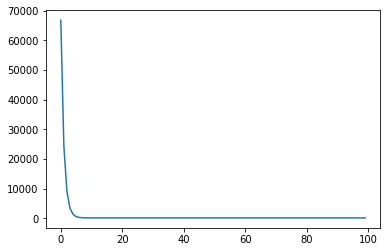

In [42]:
# Mini Batch Gradient Descent -- 100 iterations, lr = 0.01
theta,error_list = batch_gradient_descent(X,y)

plt.plot(np.arange(len(error_list)),error_list)
plt.show()

- We can see the difference in the convergence speed, in Mini Batch gradient descent, algorithm is converging in less than 20 iterations (used only 100 iterations(epochs))
- In gradient descent it is converging after almost 250 iterations
- Because in mini batch GD magnitude of update of theta is much higher, that's why it is going to take less number of points to converge

- There will be noise in the trajectory, when we plot contours
- There will also be a noise in the loss function

In [46]:
#calculating error after each theta update, therfore do it on x_batch and y_batch not on whole dataset

def batch_gradient_descent(X,y,batch_size=200,learning_rate=0.01,max_iters=10):
    n = X.shape[1]
    theta = np.zeros(n)
    error_list = []
    
    data = np.hstack((X,y.reshape(-1,1))) 
    
    for i in range(max_iters):
        
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        
        for j in range(total_batches):
            batch_data = data[j*batch_size:(j+1)*batch_size,:]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
        
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            
    return theta,error_list

104.06006106646856


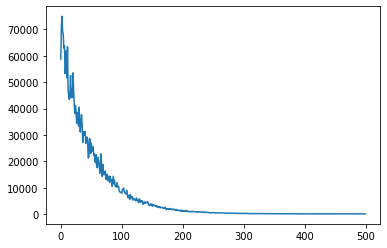

In [49]:
theta,error_list = batch_gradient_descent(X,y)

print(error_list[-1])
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

- 50 batches * 10 iterations
- In each iteration we are making 50 updates,in total 500 updates whereas in gradient descent we are making 300 updates
    - we are using 200 data points for each update and in gradient descent we are using 10,000 data points to make updates, that's why mini is faster
- we can see the noise in the curve
- 104 is the final loss after 10 epochs, we are taking 300 ephocs in gradient descent with the same learnig rate(0.01)

In [50]:
#if we make batch_size = 1 then it will be Stochastic gradient descent 

def batch_gradient_descent(X,y,batch_size=1,learning_rate=0.01,max_iters=10):
    n = X.shape[1]
    theta = np.zeros(n)
    error_list = []
    
    data = np.hstack((X,y.reshape(-1,1))) 
    
    for i in range(max_iters):
        
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        
        for j in range(total_batches):
            batch_data = data[j*batch_size:(j+1)*batch_size,:]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
        
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            
    return theta,error_list

5.062174321646847


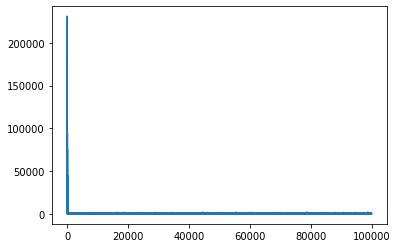

In [51]:
theta,error_list = batch_gradient_descent(X,y)

print(error_list[-1])
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

- we are making 10,000 updates in 1 single iteration
- Converging in almost 1 iteration, btaches = 10000/1(batch size), iterations = 10 therfore 100,000 updates

In [54]:
#if we make batch_size = 20, will still converge very fast

def batch_gradient_descent(X,y,batch_size=20,learning_rate=0.01,max_iters=10):
    n = X.shape[1]
    theta = np.zeros(n)
    error_list = []
    
    data = np.hstack((X,y.reshape(-1,1))) 
    
    for i in range(max_iters):
        
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        
        for j in range(total_batches):
            batch_data = data[j*batch_size:(j+1)*batch_size,:]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
        
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            
    return theta,error_list

63.75002134446343


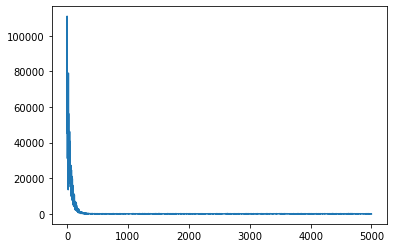

In [55]:
theta,error_list = batch_gradient_descent(X,y)

print(error_list[-1])
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

- very popular in deep learning
- Mini GD has some advantage over Gradient descent:
    - Faster convergence
    - noisy updates helps to avoid local minima(also lead to more robust convergence), we will see in deep learning our loss function is non-convex then we would like to avoid local minima, we would be needing global minima
    - vectorization but in SGD cannot use vectorization (disadvantage)
    - no need to load the entire dataset into memory, can make a pipeline that will load a batch, we will calculate gradient, in meanwhile we will load another batch, after calculation of gradient we will remove the batch from the memory